# STat Deskriptif Data Sekunder

In [62]:
import pandas as pd

In [63]:
# File path
file_path = 'data/dataset_sekunder_3.xlsx'

# Load Excel file
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

In [64]:
# Initialize an empty list to store the results
all_results = []

# Process each sheet
for sheet in sheet_names:
    # Read data from the current sheet
    df = excel_data.parse(sheet)
    
    # Drop the 'HR' column if it exists
    if 'HR' in df.columns:
        df = df.drop(columns=['HR'])
    
    # Initialize a dictionary for the current sheet
    sheet_result = {'day': sheet}

    # Process columns
    for col in df.select_dtypes(include=['number']).columns:
        if 'curah_hujan' in col.lower():
            sheet_result[f"{col}_total"] = df[col].sum()
        else:
            sheet_result[f"{col}_mean"] = df[col].mean()

    all_results.append(sheet_result)


In [65]:
# Create a DataFrame from the results
results_df = pd.DataFrame(all_results)
results_df = results_df.round(2)

results_df

,day,suhu_udara_mean,kelembapan_relatif_mean,curah_hujan_total,kecepatan_angin_mean
0,day 01,30.91,48.87,0.01,3.80
1,day 02,31.78,45.59,0.07,2.75
2,day 03,32.63,42.55,0.00,2.79
3,day 04,32.22,44.36,0.00,3.95
4,day 05,31.17,50.62,0.40,4.02
5,day 06,29.56,57.60,1.15,2.42
6,day 07,28.52,61.29,1.36,1.91
7,day 08,29.65,56.69,3.32,2.93
8,day 09,30.00,53.66,0.91,2.60
9,day 10,31.25,47.15,0.01,3.69


In [66]:
# Save the final DataFrame to a CSV file
results_df.to_csv('hasil/statistik deskriptif data sekunder.csv', index=False)

# Korelasi Pearson

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset (replace 'file_path' with the actual file path)
file_path = 'data/Gabungan data sekunder dan et.xlsx'
data = pd.read_excel(file_path)
data

,Evapotranspirasi,suhu_udara,kelembapan_relatif,curah_hujan,kecepatan_angin
0,4.06,30.91,48.87,0.01,3.80
1,3.05,31.78,45.59,0.07,2.75
2,3.12,32.63,42.55,0.00,2.79
3,4.15,32.22,44.36,0.00,3.95
4,4.33,31.17,50.62,0.40,4.02
5,2.96,29.56,57.60,1.15,2.42
6,2.92,28.52,61.29,1.36,1.91
7,3.43,29.65,56.69,3.32,2.93
8,4.27,30.00,53.66,0.91,2.60
9,5.13,31.25,47.15,0.01,3.69


In [7]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,Evapotranspirasi,suhu_udara,kelembapan_relatif,curah_hujan,kecepatan_angin
Evapotranspirasi,1.000000,0.274241,-0.329699,-0.333367,0.744131
suhu_udara,0.274241,1.000000,-0.986824,-0.697289,0.598183
kelembapan_relatif,-0.329699,-0.986824,1.000000,0.733318,-0.591497
curah_hujan,-0.333367,-0.697289,0.733318,1.000000,-0.429251
kecepatan_angin,0.744131,0.598183,-0.591497,-0.429251,1.000000


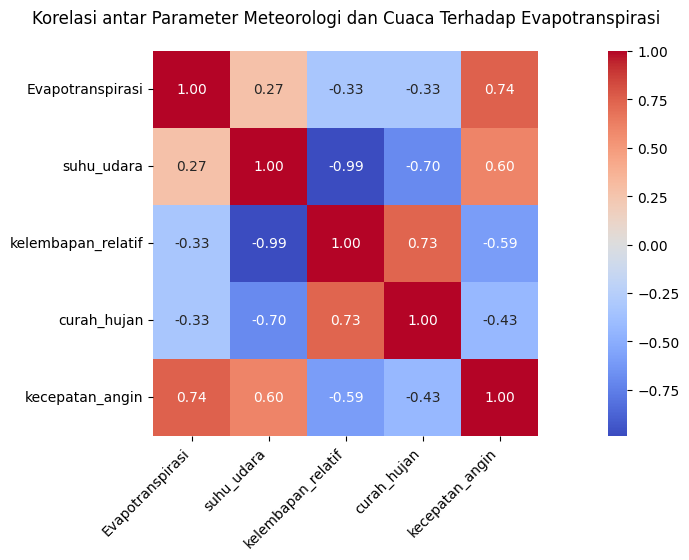

In [22]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(18, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.xticks(rotation=45, ha='right')
plt.title("Korelasi antar Parameter Meteorologi dan Cuaca Terhadap Evapotranspirasi", pad=20)
plt.show()

In [ ]:
# Display the correlation matrix


# Optional: Save the correlation matrix to a CSV file for further use
# correlation_matrix.to_csv('Correlation_Matrix.csv', index=True)